<a href="https://colab.research.google.com/github/mkorob/NovelAnalysis/blob/main/Another_copy_of_Yet_another_copy_of_GoneWithTheWind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gone With The Wind Character Analysis

Summary of what this notebook does to insert later.


## 0. Preliminaries

In [1]:
import requests
import pandas as pd
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## 1. Load Gone With The Wind Text from Gutenberg


In [3]:
# URL of "Gone with the Wind" on Project Gutenberg
url = "https://gutenberg.net.au/ebooks02/0200161.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the content of the book
    content = response.text

    # Remove Project Gutenberg's header and footer
    start_index = content.find("CHAPTER I")
    end_index = content.find("THE END")
    content = content[start_index:end_index]

    # Display the first 500 characters of the content
    print(content[:500])
else:
    print("Failed to retrieve the book from Project Gutenberg.")

CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm as the Tarleton twins were.  In her face were
too sharply blended the delicate features of her mother, a Coast
aristocrat of French descent, and the heavy ones of her florid
Irish father.  But it was an arresting face, pointed of chin,
square of jaw.  Her eyes were pale green without a touch of hazel,
starred with bristly black lashes and slightly tilted at the ends.
Above them, her thick black bro


In [4]:
#check the start and the end of the novel
print(f"The Start of the GTTW : {content[:100]}")
print(f"The End of the GTTW : {content[-100:]}")

The Start of the GTTW : CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm a
The End of the GTTW : it then.
Tomorrow, I'll think of some way to get him back.  After all,
tomorrow is another day."






## 2. Extract Main Characters

To analyze interactions, we need to map the named entities in the text to the names of the main characters. Here, we make a list of all characters in the novel the way they are referred to in a novel and map them to a unique list of characters in the novel. (e.g. "Catherine", "Cathy", -> "Catherine").

In [5]:
import spacy

In [6]:
def extract_characters(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)

    return sorted(named_entities)

In [7]:
len(content)

2340566

In [8]:
#Spacy NER's extractor needs shorter texts so we split in thirds
thir_content = int(len(content)/3)
characters1 = extract_characters(content[:thir_content])
characters2 = extract_characters(content[thir_content:(thir_content*2)])
characters3 = extract_characters(content[(thir_content*2):])

In [9]:
characters = set(characters1) | set(characters2) | set(characters3)

In [10]:
characters = [c for c in list(characters) if c[0].isupper()]

In [11]:
len(characters)

778

In [12]:
characters = sorted(characters)

In [13]:
#remove any characters that are subsets of one another (e.g. no need for Charles and Charles Hamilton)
unique_characters = set()
for name in characters:
    if not any(f"{n.strip()} " in name.strip() or f"{n.strip()}\n" in name.strip() for n in unique_characters):
        unique_characters.add(name)

In [14]:
len(unique_characters)

535

In [15]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(characters).to_csv("possible_characters.csv")

In [16]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(unique_characters).to_csv("possible_reduced_characters_v2.csv")

In [17]:
#import the completed list
characters = pd.read_excel("/content/possible_reduced_characters_v2 (1).xlsx")

In [18]:
#this is old output, the new one should have two columns, one for name as in book, the second for the "real name"
characters = characters[['character', 'character_real']].loc[characters['character_real'] != "remove", :].reset_index(drop = True)

In [19]:
characters

,character,character_real
0,Rosa,Rosa
1,Watling,Watling
2,Kill Ashley,Ashley
3,Darcy,Darcy
4,Ulster,Ulster
...,...,...
221,Sadie Belle,Belle
222,Wynder,Wynder
223,Rene,Rene
224,Pork,Pork


In [20]:
characters['character_real'].unique()

array(['Rosa', 'Watling', 'Ashley', 'Darcy', 'Ulster', 'Scarlett',
       'Bonnie', 'Jeff\nDavis', 'Mammy', 'Merriwether', 'Jack', 'Munroe',
       'Fontaine', 'Pauline', 'Dan Tucker', 'Buck Munroe', 'Rhett',
       'Mick', 'Pharisees', 'Poke', 'Pitty', 'Sam', 'Suellen', 'Bullock',
       'Prissy', 'Susan Elinor', 'Sarah Jane', 'Phillip', 'Melanie',
       'Nathan Bedford Forrest', 'Frank', 'Robillard', 'Will', 'Bub',
       'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson',
       'Doc Fontaine', 'Charles', 'Andy Bonnell', 'Betsy', 'Carreen',
       'Brown', 'Morgan', 'Wade', 'Calverts', 'Emmie', 'Jonas', 'Betty',
       'Archie', 'Cathleen', 'Jane', 'Jerry', 'Dilcey', 'Brenton',
       'Hilton', 'Tom', 'Alex', 'Jim', 'Sylvia', 'Beau', 'Hetty Tarleton',
       'Suzannah Talbot', 'Elsing', 'Lou', 'Boyne', 'Calhoun',
       'Dolly Merriwether', 'Meade', 'John', 'Stuart', 'Caroline Irene',
       'Jeb Stuart', 'Gerald', 'Hugh', 'Melissy', 'Bonnell', 'Wilkerson',
       'T

## 3. Split Text into Narrative and Dialogue

In [21]:
def split_text(text):

    sections = []

    inside_quote = False
    start_index = 0
    end_index = 0
    current_quote_type = "Narrative"
    count_quotations =0

    for i, char in enumerate(text):
        if char == '"' and count_quotations == 0:
            if not inside_quote and text[i+1].isupper():
                #append existing text
                sections.append({ 'text': text[start_index:i].strip(), 'type': "Narrative"})
                #start end
                inside_quote = True
                start_index = i
                current_quote_type = 'Dialogue'
                count_quotations = 1
        elif char == '"' and count_quotations == 1:
            if inside_quote:
                inside_quote = False
                end_index = i
                #append existing text
                sections.append({ 'text': text[start_index:end_index+1].strip(), 'type': "Dialogue"})
                start_index = i +1
                count_quotations = 0
    return sections

In [22]:
#split text into sections
def split_text_into_sections(text):
    sections = []

    for line in text.split('\r\n\r\n'):
        line = line.strip()
        if line:
          if '"' in line:
            sections = sections + split_text(line)
          else:
            sections.append({'text': line, 'type': 'Narrative'})

    df = pd.DataFrame(sections)
    return df

In [23]:
result_df = split_text_into_sections(content)
#filter out empty sections (paragraphs spaces)
result_df = result_df.loc[result_df['text'] != "", ]

In [24]:
result_df

,text,type
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative
1,"""I know you two don't care about being expelle...",Dialogue
2,she said.,Narrative
3,"""But what about Boyd? He's kind of set on get...",Dialogue
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue
...,...,...
13005,"""I won't think of it now,""",Dialogue
13006,"she said again, aloud, trying to push\nher mis...",Narrative
13007,"""I'll--why, I'll go home to Tara\ntomorrow,""",Dialogue
13008,and her spirits lifted faintly.\n\nShe had gon...,Narrative


In [25]:
#export df to check for any issues
result_df.to_csv("content_df.csv")

In [26]:
result_df.head(n = 50)

,text,type
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative
1,"""I know you two don't care about being expelle...",Dialogue
2,she said.,Narrative
3,"""But what about Boyd? He's kind of set on get...",Dialogue
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue
6,answered Brent carelessly.,Narrative
7,"""Besides, it don't\nmatter much. We'd have ha...",Dialogue
9,"""Why?""",Dialogue
11,"""The war, goose! The war's going to start any...",Dialogue
13,"""You know there isn't going to be any war,""",Dialogue


##4. Match Entities between Dialogue Sections

In [27]:
def match_entities(text, text_type, characters):
    if text_type == "Narrative":
        ent_out = []
        for index, row in characters.iterrows():
            entity = row['character']
            matches = re.finditer(re.escape(entity), text)
            for match in matches:
                ent_out.append((match.start(), match.end(), row['character_real']))
        ent_out.sort(key=lambda x: x[0])
        #return all characters unless they were just mentioned before
        return [ent_out[i][2] for i in range(len(ent_out)) if i == 0 or ent_out[i][2] != ent_out[i - 1][2]]

    else:
        return None


result_df['Entities'] = result_df.apply(lambda row: match_entities(row['text'], row['type'], characters), axis=1)

In [28]:
result_df.head(n=50)

,text,type,Entities
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative,"[Scarlett, Tarleton, Stuart, Brent, Tarleton, ..."
1,"""I know you two don't care about being expelle...",Dialogue,None
2,she said.,Narrative,[]
3,"""But what about Boyd? He's kind of set on get...",Dialogue,None
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue,None
6,answered Brent carelessly.,Narrative,[Brent]
7,"""Besides, it don't\nmatter much. We'd have ha...",Dialogue,None
9,"""Why?""",Dialogue,None
11,"""The war, goose! The war's going to start any...",Dialogue,None
13,"""You know there isn't going to be any war,""",Dialogue,None


In [29]:
convo_df =  pd.DataFrame(data = {
        'Character1': [],
        'Character2': [],
        'StartIndex': [],
        'EndIndex': [],
        'text_out': []
    })

convo_characters = []
convo_start = None
convo_end = None
text_out = ""
for idx, row in result_df.iterrows():
  if row['type'] == "Dialogue":
    convo_end = idx
    text_out += row['text']
    if convo_start is None:
      convo_start = idx

  else:
    if row['type'] == "Narrative":
      for entity in row['Entities']:
        if entity not in convo_characters and convo_characters is not None:
            convo_characters.append(entity)
        if len(convo_characters) > 2:
            new_row = pd.DataFrame(data= {'Character1': convo_characters[0], 'Character2': convo_characters[1], 'StartIndex': convo_start, 'EndIndex': convo_end, 'text_out': text_out}, index=[0])
            convo_df = pd.concat([convo_df, new_row])
            convo_characters = [convo_characters[-1]]
            convo_start = None
            text_out = ""

In [30]:
convo_df = convo_df.dropna()

In [31]:
def merge_characters(char1, char2):
  list_out = "_".join(sorted([char1, char2]))
  return str(list_out)

In [32]:
convo_df['characters'] = convo_df.apply(lambda row: merge_characters(row['Character1'], row['Character2']), axis=1)

In [33]:
convo_df['character_count'] = convo_df['text_out'].apply(len)

In [34]:
convo_df

,Character1,Character2,StartIndex,EndIndex,text_out,characters,character_count
0,Scarlett,Brent,1,19,"""I know you two don't care about being expelle...",Brent_Scarlett,1015
0,Stuart,Scarlett,21,27,"""The Yankees may be scared of us, but after th...",Scarlett_Stuart,971
0,Tom,Fontaine,29,33,"""Didn't she say anything when you got home las...",Fontaine_Tom,1302
0,Beatrice,Tarleton,35,35,"""Of course she won't hit Boyd. She never did ...",Beatrice_Tarleton,126
0,Stuart,Scarlett,37,49,"""That's why we left him\nat home to explain th...",Scarlett_Stuart,714
...,...,...,...,...,...,...,...
0,Ashley,Scarlett,12887,12897,"""But love can't wear out!""""Yours for Ashley di...",Ashley_Scarlett,1702
0,Rhett,Belle,12899,12911,"""It was so obvious that we were meant for each...",Belle_Rhett,2113
0,Ashley,Rhett,12913,12947,"""But then, there was Bonnie and I saw that eve...",Ashley_Rhett,2358
0,Gerald,Rhett,12949,12971,"""Don't be a fool, Rhett! I can make--""""Don't ...",Gerald_Rhett,1676


<Axes: xlabel='characters'>

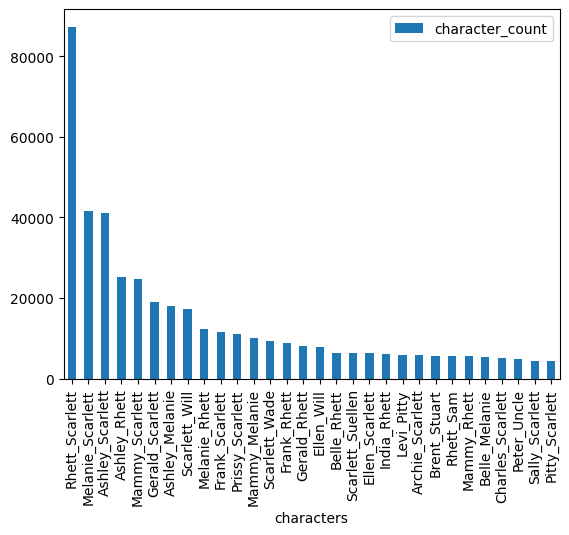

In [35]:
convo_df.groupby(['characters']).agg({'character_count': 'sum'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

In [36]:
main_interactions  = ["Rhett_Scarlett", "Ashley_Scarlett", "Melanie_Scarlett", "Gerald_Scarlett"]

In [37]:
main_characters = ["Scarlett", "Rhett", "Ashley", "Gerald", "Melanie"]

In [38]:
convo_df_main = convo_df.loc[convo_df['characters'].isin(main_interactions), :].reset_index(drop = True)

<Axes: xlabel='characters'>

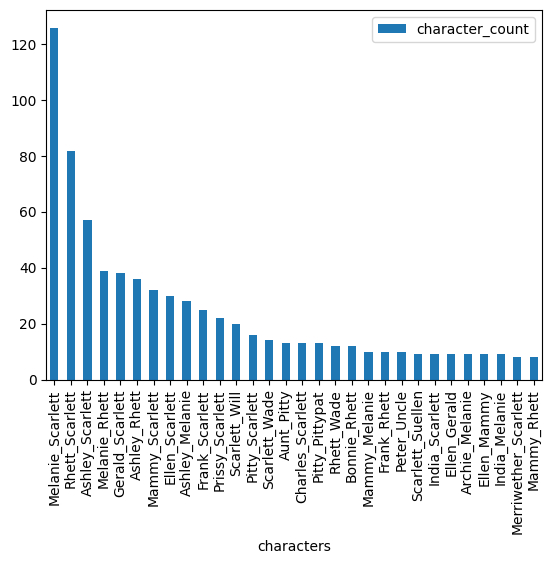

In [39]:
convo_df.groupby(['characters']).agg({'character_count': 'count'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

## 5. Pre-process Text for Regressions and LDA


### 5.1 Clean text from stopwords and other irrelevant words

In [40]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('possible_reduced_characters_v2 (1).xlsx', header=None)

# Filter the DataFrame to exclude rows where the third column contains "remove"
filtered_df = df[df.iloc[:, 2] != 'remove']

# Extract unique character names from the first column
character_names_all = filtered_df.iloc[:, 1].unique()

row_to_remove = 0
if row_to_remove < len(character_names_all):
    character_names_all = list(character_names_all)
    character_names_all.pop(row_to_remove)

# Print the extracted character names
print(character_names_all)

['Rosa', 'Watling', 'Kill Ashley', 'Darcy', 'Ulster', 'Scarlert', 'Eugenie Victoria', 'Jeff\nDavis', 'Tell Mammy', 'Merriwether', 'Jack', 'Munroe', 'Scarlett', 'Mama Fontaine', 'Pauline', 'Dan Tucker', 'Unless Ashley', 'Buck Munroe', 'Fortunately Scarlett', 'Butler', 'Mick', 'Katie\nScarlett', 'Pharisees', 'Poke', 'Pitty', 'Big Sam', 'Sue', 'Bullock', 'Damn Prissy', 'Susan Elinor', 'Sarah Jane', 'Sam', 'Phil', 'Melly', 'Nathan Bedford Forrest', 'Sometimes Frank', 'Pierre Robillard', 'All Scarlett', 'Benteen', 'Bub', 'Mellie', 'Melanie', 'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson', 'Generally Scarlett', 'Doc Fontaine', 'Dalton', 'Andy Bonnell', 'Suellen', 'Mammy, Cookie', 'Betsy', 'Small Carreen', 'Brown', 'Morgan', 'Wade', 'Calverts', 'Philip', 'Emmie', 'Kennedy', 'Jonas', 'Slattery', 'Betty', 'Bulloch', 'Off Scarlett', 'Calvert', 'Jane', 'Jerry', 'Dilcey', 'Mel--', 'Brenton', 'Yankee Hilton', 'Cathleen', 'Mees Scarlett', 'Tom', 'Mammy--Mammy', 'Wheeler', 'Alex.',

In [41]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Manually add additional stopwords
additional_stopwords = [name.lower() for name in character_names_all]
custom_list_of_extra_stopwords = ["nt", "'s", "'m", "'ve", "'em", "'ll", "'t", "'d", "us", "'re", "theres", "therere", "theyd", "theyve"]
# Combine NLTK stopwords with additional stopwords
all_stopwords = set(stopwords.words('english') + custom_list_of_extra_stopwords)

# Define a function to remove stopwords from text
def remove_stopwords(text):
    # Tokenize the text
    punctuation_pattern = re.compile(r'[^\w\s]')
    # Remove punctuation marks from the text
    text = punctuation_pattern.sub('', text.lower())
    for substring in additional_stopwords:
        text = text.replace(substring, '')
    #text = regex.sub("", text.lower())
    #text = re.sub(characters_pattern, '', text)
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word.lower() in all_stopwords]
    # Join tokens back into a string
    filtered_text = ' '.join(tokens_without_sw)
    return filtered_text


# Assuming convo_df_main is your DataFrame and 'text_out' is the column containing text
# Apply the remove_stopwords function to the 'text_out' column
convo_df_main['text_out_processed'] = convo_df_main['text_out'].apply(remove_stopwords)

# Print the DataFrame to see the result
convo_df_main['text_out_processed'].head(60)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                             careful careful take back
1     something important tell hardly know say itnot...
2                     none county touch statewell missy
3     reason bought asked buy herwell use buying goi...
4     twelve oaksabout usual cade settled set galler...
5     well speak uphe asked kindly sisters said hope...
6     im sorry daughter nothing child lots xmother f...
7     wish youd quit pushing dont want tara old plan...
8     youre young come love land getting away youre ...
9                      brat baptizedyes dead poor thing
10    ley hasnt idea im love himhow could know ive a...
11    getting another overseer wouldnt cheating eyet...
12    put tray come lace tighterand ill try eat litt...
13    ill remember tiful day till dieperhaps wedding...
14    mrs takes toss every huntand breaks collar bon...
15    drive well wear get horses yet course shes rig...
16           looks ifas knew looked like without shimmy
17    live barbecue till afternoonof course atte

In [42]:
convo_df_main

,Character1,Character2,StartIndex,EndIndex,text_out,characters,character_count,text_out_processed
0,Gerald,Scarlett,51,51,"""Be careful! Be careful! We had you once. W...",Gerald_Scarlett,73,careful careful take back
1,Melanie,Scarlett,327,329,"""Scarlett, I have something so important\nto t...",Melanie_Scarlett,173,something important tell hardly know say itnot...
2,Gerald,Scarlett,335,337,"""There's none in the County can touch you, nor...",Gerald_Scarlett,75,none county touch statewell missy
3,Scarlett,Gerald,359,361,"""And the only reason you\nbought her was becau...",Gerald_Scarlett,306,reason bought asked buy herwell use buying goi...
4,Scarlett,Gerald,363,373,"""How are they all over at Twelve Oaks?""""About ...",Gerald_Scarlett,748,twelve oaksabout usual cade settled set galler...
...,...,...,...,...,...,...,...,...
298,Scarlett,Melanie,12637,12649,"""Good night,""""Promise me--""""Anything, darling....",Melanie_Scarlett,162,good nightpromise meanything darling kind helo...
299,Melanie,Scarlett,12653,12653,"""Melly is the only woman friend I ever had,""",Melanie_Scarlett,44,woman friend ever
300,Scarlett,Melanie,12733,12737,"""I don't want a word out of either of you.""""I ...",Melanie_Scarlett,516,dont want word either youi mustnt cry front th...
301,Scarlett,Rhett,12791,12885,"""So she's dead. That makes it nice for you, d...",Rhett_Scarlett,3383,shes dead makes nice doesnt itoh say thingsyou...


In [43]:
def count_tokens(text):
    # Split the text by whitespace to get tokens
    tokens = text.split()
    # Return the count of tokens
    return len(tokens)

# Apply the function to each row in the 'text_out_processed' column
convo_df_main['token_count'] = convo_df_main['text_out_processed'].apply(count_tokens)

In [44]:
convo_df_main

,Character1,Character2,StartIndex,EndIndex,text_out,characters,character_count,text_out_processed,token_count
0,Gerald,Scarlett,51,51,"""Be careful! Be careful! We had you once. W...",Gerald_Scarlett,73,careful careful take back,4
1,Melanie,Scarlett,327,329,"""Scarlett, I have something so important\nto t...",Melanie_Scarlett,173,something important tell hardly know say itnot...,13
2,Gerald,Scarlett,335,337,"""There's none in the County can touch you, nor...",Gerald_Scarlett,75,none county touch statewell missy,5
3,Scarlett,Gerald,359,361,"""And the only reason you\nbought her was becau...",Gerald_Scarlett,306,reason bought asked buy herwell use buying goi...,23
4,Scarlett,Gerald,363,373,"""How are they all over at Twelve Oaks?""""About ...",Gerald_Scarlett,748,twelve oaksabout usual cade settled set galler...,55
...,...,...,...,...,...,...,...,...,...
298,Scarlett,Melanie,12637,12649,"""Good night,""""Promise me--""""Anything, darling....",Melanie_Scarlett,162,good nightpromise meanything darling kind helo...,11
299,Melanie,Scarlett,12653,12653,"""Melly is the only woman friend I ever had,""",Melanie_Scarlett,44,woman friend ever,3
300,Scarlett,Melanie,12733,12737,"""I don't want a word out of either of you.""""I ...",Melanie_Scarlett,516,dont want word either youi mustnt cry front th...,51
301,Scarlett,Rhett,12791,12885,"""So she's dead. That makes it nice for you, d...",Rhett_Scarlett,3383,shes dead makes nice doesnt itoh say thingsyou...,293


In [45]:
import pandas as pd

# Assuming convo_df_main is your existing DataFrame

# Create a new DataFrame with only the specified columns
new_df = convo_df_main[['characters', 'token_count', 'text_out_processed']].copy()

# Display the new DataFrame
print(new_df)

           characters  token_count  \
0     Gerald_Scarlett            4   
1    Melanie_Scarlett           13   
2     Gerald_Scarlett            5   
3     Gerald_Scarlett           23   
4     Gerald_Scarlett           55   
..                ...          ...   
298  Melanie_Scarlett           11   
299  Melanie_Scarlett            3   
300  Melanie_Scarlett           51   
301    Rhett_Scarlett          293   
302   Ashley_Scarlett          148   

                                    text_out_processed  
0                            careful careful take back  
1    something important tell hardly know say itnot...  
2                    none county touch statewell missy  
3    reason bought asked buy herwell use buying goi...  
4    twelve oaksabout usual cade settled set galler...  
..                                                 ...  
298  good nightpromise meanything darling kind helo...  
299                                  woman friend ever  
300  dont want word either you

In [46]:
import pandas as pd

# Assuming new_df is your DataFrame containing the columns characters, token_count, and text_out_processed

# Counting rows where token_count is less than 9 or equal to 9
count = len(new_df[(new_df['token_count'] < 9) | (new_df['token_count'] == 9)])

print("Number of rows where token_count is less than 9 or equal to 9:", count)

Number of rows where token_count is less than 9 or equal to 9: 96


In [47]:
import pandas as pd

# Assuming new_df is your DataFrame containing the columns characters, token_count, and text_out_processed

# Filter rows where token_count is 9 or less
filtered_df = new_df[new_df['token_count'] <= 9]

# Count occurrences of each word in the "characters" column
word_counts = filtered_df['characters'].value_counts()

# Print the counts
print("Number of rows with 9 or less tokens for each word in 'characters' column:")
print(word_counts)

Number of rows with 9 or less tokens for each word in 'characters' column:
characters
Melanie_Scarlett    49
Ashley_Scarlett     17
Gerald_Scarlett     16
Rhett_Scarlett      14
Name: count, dtype: int64


In [48]:
# Get unique values in the "characters" column
unique_characters = new_df['characters'].unique()

# Create separate DataFrames with different variable names
for character in unique_characters:
    globals()[f'df_{character.replace(" ", "_")}'] = new_df[new_df['characters'] == character].copy()

# Now, you have separate DataFrames named df_Gerald_Scarlett, df_Melanie_Scarlett, df_Rhett_Scarlett, and df_Ashley_Scarlett

In [49]:
df_Gerald_Scarlett

,characters,token_count,text_out_processed
0,Gerald_Scarlett,4,careful careful take back
2,Gerald_Scarlett,5,none county touch statewell missy
3,Gerald_Scarlett,23,reason bought asked buy herwell use buying goi...
4,Gerald_Scarlett,55,twelve oaksabout usual cade settled set galler...
5,Gerald_Scarlett,53,well speak uphe asked kindly sisters said hope...
6,Gerald_Scarlett,276,im sorry daughter nothing child lots xmother f...
7,Gerald_Scarlett,13,wish youd quit pushing dont want tara old plan...
8,Gerald_Scarlett,148,youre young come love land getting away youre ...
9,Gerald_Scarlett,5,brat baptizedyes dead poor thing
11,Gerald_Scarlett,35,getting another overseer wouldnt cheating eyet...


In [50]:
df_Melanie_Scarlett

,characters,token_count,text_out_processed
1,Melanie_Scarlett,13,something important tell hardly know say itnot...
12,Melanie_Scarlett,15,put tray come lace tighterand ill try eat litt...
19,Melanie_Scarlett,24,fear agree mr thackerays works cynic fear gent...
21,Melanie_Scarlett,3,didnt reallywhat say
22,Melanie_Scarlett,25,think acted fast girl could act todayeavesdrop...
...,...,...,...
295,Melanie_Scarlett,53,must hold cant let get awayits promise meoh an...
296,Melanie_Scarlett,35,leythank god know im worth thank letting knoww...
298,Melanie_Scarlett,11,good nightpromise meanything darling kind helo...
299,Melanie_Scarlett,3,woman friend ever


In [51]:
df_Rhett_Scarlett

,characters,token_count,text_out_processed
36,Rhett_Scarlett,21,husband dead longoh yes long time almost yeara...
37,Rhett_Scarlett,45,pompous goat isnt hebut things enough good lad...
38,Rhett_Scarlett,12,something youoh darlingyou brave brave girl wa...
41,Rhett_Scarlett,14,another one perhapsnomrs hamiltoni tell imposs...
42,Rhett_Scarlett,32,money told doesnt care anything confederacy sa...
...,...,...,...
289,Rhett_Scarlett,49,wait till shes old enough hunttherell one like...
290,Rhett_Scarlett,23,mother watch daddy says cani really must get a...
291,Rhett_Scarlett,12,hush fool let go anyone want stay housenowdr t...
292,Rhett_Scarlett,97,mrs wilkes ill come home immediatelyshe isntno...


In [52]:
df_Ashley_Scarlett

,characters,token_count,text_out_processed
10,Ashley_Scarlett,65,ley hasnt idea im love himhow could know ive a...
13,Ashley_Scarlett,8,ill remember tiful day till dieperhaps wedding...
17,Ashley_Scarlett,13,live barbecue till afternoonof course attentiv...
20,Ashley_Scarlett,15,lets dont hot headed lets dont war misery worl...
26,Ashley_Scarlett,2,baby house
28,Ashley_Scarlett,5,want good time jine cavalry
61,Ashley_Scarlett,2,dear wife
64,Ashley_Scarlett,1,dixie
78,Ashley_Scarlett,13,forgive saying know love arent mad youdont sil...
80,Ashley_Scarlett,9,gentlemen georgia troops well cant get along w...


In [53]:
import pandas as pd

# List of DataFrames
dataframes = [df_Ashley_Scarlett, df_Rhett_Scarlett, df_Gerald_Scarlett, df_Melanie_Scarlett]
for df in dataframes:
    # Drop the 'characters' column
    df.drop(columns=['characters'], inplace=True)

    # Reset the index
    df.reset_index(drop=True, inplace=True)

    # Print the DataFrame after removing the 'characters' column and resetting the index
    print(df)

    token_count                                 text_out_processed
0            65  ley hasnt idea im love himhow could know ive a...
1             8  ill remember tiful day till dieperhaps wedding...
2            13  live barbecue till afternoonof course attentiv...
3            15  lets dont hot headed lets dont war misery worl...
4             2                                         baby house
5             5                        want good time jine cavalry
6             2                                          dear wife
7             1                                              dixie
8            13  forgive saying know love arent mad youdont sil...
9             9  gentlemen georgia troops well cant get along w...
10          142  perhaps old march ride shoot mrs kindly lent w...
11            2                                            god ley
12            8       news newsdont know fer sartin lady soon tell
13          238  couldnt tonight boy homewhat luckdont giggled

In [54]:
num_rows = df_Ashley_Scarlett.shape[0]
print("Number of rows in df_Ashley_Scarlett:", num_rows)

Number of rows in df_Ashley_Scarlett: 57


In [55]:
num_rows = df_Rhett_Scarlett.shape[0]
print("Number of rows in df_Rhett_Scarlett:", num_rows)

Number of rows in df_Rhett_Scarlett: 82


In [56]:
num_rows = df_Gerald_Scarlett.shape[0]
print("Number of rows in df_Gerald_Scarlett:", num_rows)

Number of rows in df_Gerald_Scarlett: 38


In [57]:
num_rows = df_Melanie_Scarlett.shape[0]
print("Number of rows in df_Melanie_Scarlett:", num_rows)

Number of rows in df_Melanie_Scarlett: 126


In [58]:
import pandas as pd

def combine_text(df):
    # Group the DataFrame into groups of 10 consecutive rows
    grouped = df.groupby(df.index // 10)

    # Aggregate each group into a single row by concatenating the text
    combined_df = grouped.agg({'text_out_processed': ' '.join, 'token_count': 'sum'}).reset_index(drop=True)

    return combined_df

# Assuming df_Ashley_Scarlett1, df_Ashley_Scarlett2, df_Ashley_Scarlett3, and df_Ashley_Scarlett4 are your dataframes
# Replace these with your actual dataframe names

# Apply the combine_text function to each dataframe
combined_df_Ashley = combine_text(df_Ashley_Scarlett)
combined_df_Rhett = combine_text(df_Rhett_Scarlett)
combined_df_Melanie = combine_text(df_Melanie_Scarlett)
combined_df_Gerald = combine_text(df_Gerald_Scarlett)

# Print the combined DataFrames
print(combined_df_Ashley)
print(combined_df_Rhett)
print(combined_df_Melanie)
print(combined_df_Gerald)

                                  text_out_processed  token_count
0  ley hasnt idea im love himhow could know ive a...          133
1  perhaps old march ride shoot mrs kindly lent w...          935
2  loved hell permit come atlanta get tax money i...          708
3  england recognized usif jeff commandeered cott...          690
4  beds dear downtown time day arent house helpin...          607
5  anything thisiyou know better never go world g...          387
                                  text_out_processed  token_count
0  husband dead longoh yes long time almost yeara...          970
1  air hungrythere wont crop yearthere aint nobod...         1097
2  put damn put walk oh would ever done without i...         1818
3  god discuss expect answer hes still love youwe...         1752
4  stranger without told word would know house bu...          266
5  man world wouldnt care much ive seen hes done ...          383
6  sat chestwas big oneoh yes dretfull big clawsa...          539
7  ragamuf

LDA:

In [59]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
# Extract text data from the DataFrame
data = combined_df_Melanie['text_out_processed'].apply(lambda x: x.split())

# Create a dictionary from the preprocessed data
dictionary = Dictionary(data)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the preprocessed text data into bag-of-words format
bow_corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['baby', 'today', 'mrs', 'really', 'afraid', 'wouldnt', 'mustnt', 'make', 'coming', 'dead']
Topic: 1
Words: ['mrs', 'something', 'help', 'id', 'old', 'came', 'thought', 'little', 'thats', 'talk']
Topic: 2
Words: ['make', 'mr', 'house', 'talk', 'things', 'mean', 'little', 'men', 'mustnt', 'havent']
Topic: 3
Words: ['back', 'baby', 'look', 'one', 'ive', 'id', 'youll', 'wouldnt', 'done', 'sister']
Topic: 4
Words: ['baby', 'ive', 'dead', 'maybe', 'id', 'look', 'back', 'done', 'poor', 'better']


In [60]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Melanie['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")


# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

Text 1 Topics:
Topic 1: ['mr', 'try', 'got', 'get', 'know', 'little', 'shes', 'want', 'think', 'ill']
Topic 2: ['little', 'get', 'got', 'want', 'mr', 'honey', 'ill', 'ever', 'tried', 'come']
Topic 3: ['know', 'shes', 'honey', 'think', 'mr', 'want', 'get', 'got', 'little', 'miss']
Topic 4: ['think', 'know', 'honey', 'got', 'shes', 'get', 'little', 'mr', 'want', 'take']
Topic 5: ['know', 'want', 'little', 'well', 'got', 'get', 'mr', 'shes', 'think', 'honey']
Text 2 Topics:
Topic 1: ['think', 'im', 'know', 'lady', 'go', 'quite', 'darling', 'hospital', 'mrs', 'home']
Topic 2: ['think', 'go', 'hospital', 'mrs', 'must', 'quite', 'im', 'know', 'enough', 'well']
Topic 3: ['must', 'think', 'go', 'mrs', 'quite', 'like', 'know', 'dont', 'isnt', 'darling']
Topic 4: ['think', 'go', 'know', 'quite', 'must', 'home', 'well', 'mrs', 'im', 'hospital']
Topic 5: ['think', 'im', 'go', 'hospital', 'quite', 'know', 'must', 'lead', 'mrs', 'darling']
Text 3 Topics:
Topic 1: ['oh', 'alarmed', 'home', 'without',

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.077205 -0.018730       1        1  33.266291
0     -0.042684 -0.076217       2        1  26.557678
3     -0.024931  0.104069       3        1  22.261107
1      0.113140 -0.022291       4        1  17.911906
2      0.031680  0.013168       5        1   0.003018, topic_info=        Term       Freq      Total Category  logprob  loglift
601     said  14.000000  14.000000  Default  30.0000  30.0000
684   forget   6.000000   6.000000  Default  29.0000  29.0000
440     baby  17.000000  17.000000  Default  28.0000  28.0000
783     love   6.000000   6.000000  Default  27.0000  27.0000
662  wouldnt  10.000000  10.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
79    people   0.000074   8.554453   Topic5  -7.2810  -1.2493
163     dear   0.000074  12.650252   Topic5  -7.2810  -1.6406
73     never   0.000074  15.248334   Topic5  -7.2810  -1.8274
332    youre   0.000074   8.858259   Topic5  -7.2811  -1.2844
189      god   0.000074  11.351032   Topic5  -7.2812  -1.5324

[361 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1193      4  0.779126  affair
127       1  0.598115  afraid
127       2  0.239246  afraid
127       3  0.119623  afraid
127       4  0.119623  afraid
...     ...       ...     ...
1455      3  0.971296    youi
332       1  0.338667   youre
332       2  0.225778   youre
332       3  0.225778   youre
332       4  0.225778   youre

[472 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 2, 3])

In [61]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Gerald['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['like', 'marry', 'im', 'daughter', 'would', 'dont', 'ley', 'come', 'want', 'nothing']
Topic 2: ['like', 'marry', 'daughter', 'im', 'dont', 'would', 'come', 'ley', 'youre', 'go']
Topic 3: ['like', 'marry', 'daughter', 'dont', 'im', 'would', 'ley', 'go', 'youd', 'queer']
Topic 4: ['like', 'im', 'daughter', 'would', 'come', 'dont', 'youre', 'man', 'ley', 'ill']
Topic 5: ['like', 'marry', 'im', 'would', 'dont', 'daughter', 'ley', 'wilkes', 'man', 'come']
Text 2 Topics:
Topic 1: ['ill', 'tis', 'dont', 'look', 'cry', 'well', 'like', 'going', 'see', 'wont']
Topic 2: ['tis', 'ill', 'cry', 'well', 'dont', 'like', 'tara', 'im', 'saying', 'look']
Topic 3: ['ill', 'well', 'tis', 'dont', 'cry', 'look', 'like', 'know', 'course', 'going']
Topic 4: ['ill', 'well', 'dont', 'tis', 'cry', 'like', 'know', 'shes', 'look', 'young']
Topic 5: ['tis', 'ill', 'cry', 'dont', 'well', 'like', 'look', 'make', 'could', 'ive']
Text 3 Topics:
Topic 1: ['mother', 'home', 'said', 'house', 'would

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.128892  0.019956       1        1  39.148976
1      0.042879 -0.114886       2        1  34.958327
3      0.077571  0.096763       3        1  25.887439
2      0.004230 -0.000909       4        1   0.003017
0      0.004212 -0.000925       5        1   0.002241, topic_info=         Term     Freq     Total Category  logprob  loglift
194     marry  7.00000  7.000000  Default  30.0000  30.0000
67   daughter  7.00000  7.000000  Default  29.0000  29.0000
656      home  6.00000  6.000000  Default  28.0000  28.0000
330       tis  8.00000  8.000000  Default  27.0000  27.0000
379     would  8.00000  8.000000  Default  26.0000  26.0000
..        ...      ...       ...      ...      ...      ...
142     house  0.00004  6.249629   Topic5  -6.7808  -1.2506
177    little  0.00004  6.409080   Topic5  -6.7808  -1.2759
555      wont  0.00004  4.872612   Topic5  -6.7808  -1.0018
94     father  0.00004  4.135217   Topic5  -6.7808  -0.8377
393     youre  0.00004  6.548280   Topic5  -6.7809  -1.2974

[340 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
396       2  0.830433   afraid
563       3  0.873584  allhold
564       3  0.873583   almost
5         1  0.695222   always
5         2  0.231741   always
...     ...       ...      ...
391       2  0.407081    young
391       3  0.407081    young
393       1  0.610847    youre
393       2  0.305424    youre
393       3  0.152712    youre

[310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 3, 1])

In [62]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Ashley['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['thinks', 'love', 'know', 'knew', 'dont', 'till', 'well', 'hes', 'probably', 'wars']
Topic 2: ['thinks', 'love', 'till', 'knew', 'know', 'dont', 'probably', 'day', 'well', 'hes']
Topic 3: ['know', 'love', 'knew', 'thinks', 'well', 'till', 'hes', 'dont', 'day', 'thats']
Topic 4: ['love', 'thinks', 'hes', 'dont', 'till', 'knew', 'know', 'cant', 'marry', 'ive']
Topic 5: ['love', 'know', 'knew', 'till', 'dont', 'hes', 'thinks', 'lets', 'wars', 'think']
Text 2 Topics:
Topic 1: ['like', 'life', 'know', 'war', 'dear', 'love', 'first', 'dont', 'must', 'mrs']
Topic 2: ['like', 'first', 'life', 'know', 'old', 'love', 'war', 'dont', 'would', 'could']
Topic 3: ['like', 'life', 'love', 'know', 'dont', 'war', 'first', 'would', 'mrs', 'old']
Topic 4: ['like', 'life', 'war', 'first', 'know', 'would', 'love', 'came', 'gone', 'dont']
Topic 5: ['like', 'life', 'know', 'war', 'first', 'love', 'gone', 'things', 'would', 'dont']
Text 3 Topics:
Topic 1: ['get', 'ley', 'say', 'way', '

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.089461 -0.053955       1        1  47.484044
1     -0.106133 -0.050208       2        1  41.326511
3     -0.007423  0.090228       3        1  11.185118
2      0.012061  0.006975       4        1   0.002678
4      0.012034  0.006960       5        1   0.001650, topic_info=         Term       Freq      Total Category  logprob  loglift
374      life  12.000000  12.000000  Default  30.0000  30.0000
54       know  27.000000  27.000000  Default  29.0000  29.0000
48        ill  13.000000  13.000000  Default  28.0000  28.0000
575      tara   7.000000   7.000000  Default  27.0000  27.0000
613    wanted   9.000000   9.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
449       old   0.000037  12.091199   Topic5  -7.3387  -1.6822
459    people   0.000037  11.824526   Topic5  -7.3388  -1.6599
320      home   0.000037   9.624457   Topic5  -7.3390  -1.4542
661  anything   0.000037  12.916946   Topic5  -7.3390  -1.7485
97       well   0.000037  15.767666   Topic5  -7.3391  -1.9480

[362 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1426      3  1.000135  abuses
3         1  0.339948  always
3         2  0.679896  always
3         3  0.084987  always
657       1  1.010412    amed
...     ...       ...     ...
1229      3  0.370372   youll
650       1  0.698157   youre
650       3  0.279263   youre
652       1  0.751854   youve
652       2  0.250618   youve

[357 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3, 5])

In [63]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Rhett['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['dont', 'im', 'money', 'never', 'think', 'ill', 'get', 'england', 'like', 'anything']
Topic 2: ['ill', 'im', 'dont', 'never', 'money', 'think', 'one', 'england', 'like', 'tell']
Topic 3: ['dont', 'ill', 'never', 'money', 'im', 'like', 'think', 'one', 'england', 'get']
Topic 4: ['never', 'money', 'think', 'like', 'one', 'im', 'dont', 'ill', 'enough', 'get']
Topic 5: ['ill', 'like', 'think', 'money', 'dont', 'never', 'im', 'anything', 'tell', 'would']
Text 2 Topics:
Topic 1: ['yankees', 'go', 'going', 'cant', 'home', 'get', 'see', 'old', 'wont', 'think']
Topic 2: ['go', 'yankees', 'home', 'cant', 'going', 'get', 'like', 'wont', 'road', 'even']
Topic 3: ['yankees', 'go', 'going', 'home', 'get', 'cant', 'wont', 'dont', 'see', 'come']
Topic 4: ['yankees', 'go', 'home', 'going', 'cant', 'get', 'wont', 'see', 'like', 'dont']
Topic 5: ['yankees', 'home', 'go', 'cant', 'wont', 'get', 'like', 'road', 'going', 'general']
Text 3 Topics:
Topic 1: ['dont', 'want', 'get', 'mo

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.034784 -0.085884       1        1  48.202940
4      0.092735 -0.003450       2        1  32.254152
3      0.024632  0.100323       3        1  19.540385
1     -0.076071 -0.005480       4        1   0.001351
2     -0.076080 -0.005510       5        1   0.001172, topic_info=        Term       Freq      Total Category  logprob  loglift
614  yankees  24.000000  24.000000  Default  30.0000  30.0000
224       go  39.000000  39.000000  Default  29.0000  29.0000
227    going  46.000000  46.000000  Default  28.0000  28.0000
360    money  51.000000  51.000000  Default  27.0000  27.0000
304      ley  23.000000  23.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
337   matter   0.000032  14.721809   Topic5  -7.9299  -1.6867
404   people   0.000032  20.047394   Topic5  -7.9303  -1.9959
372     must   0.000032  21.571058   Topic5  -7.9304  -2.0693
699     dear   0.000032  20.859048   Topic5  -7.9306  -2.0359
102     come   0.000032  22.167969   Topic5  -7.9310  -2.0972

[415 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2391      3  0.828892      able
2629      2  0.772705     agree
630       3  0.752670       air
631       3  0.828900  almighty
634       3  0.828921  andandso
...     ...       ...       ...
1708      1  0.725506     youll
1708      2  0.241835     youll
1710      1  0.535970     youve
1710      2  0.341072     youve
1710      3  0.097449     youve

[455 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 2, 3])

### 5.2 Vectorize text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 3))

In [ ]:
convo_df_main['characters'].value_counts()

In [ ]:
def select_equal_groups(group: pd.core.groupby.generic.DataFrameGroupBy, n: int):
    return group.sample(min(n, len(group)), random_state=42)

df_train = convo_df_main.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 25)

In [ ]:
df_test = convo_df_main[~convo_df_main.index.isin(df_train.index)]

In [ ]:
print(df_train['characters'].value_counts())
print(df_test['characters'].value_counts())

In [ ]:
X_train = vectorizer.fit_transform(df_train['text_out_test'])
X_test = vectorizer.transform(df_test['text_out_test'])
y_train = df_train.characters.reset_index(drop = True)
y_test = df_test.characters.reset_index(drop = True)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

##6. Inspect Variables for Correlations


In [ ]:
# # Convert TF-IDF matrix to DataFrame
# tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# # Calculate correlation matrix
# correlation_matrix = tfidf_df.corr()

# # Find highly correlated variables
# highly_correlated = set()
# threshold = 0.98  # You can adjust this threshold as needed

# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             colname_i = correlation_matrix.columns[i]
#             colname_j = correlation_matrix.columns[j]
#             highly_correlated.add((colname_i, colname_j))

# print("Highly correlated variables:")
# for pair in highly_correlated:
#     print(pair)

##7. Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
!pip install eli5
import eli5
eli5.show_weights(logreg, feature_names = vectorizer.get_feature_names_out())

## 8. Network Analysis (to delete?)


In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(convo_df, 'Character1', 'Character2', edge_attr='character_count', create_using=nx.DiGraph())

# Draw the graph (optional)
nx.draw(G, with_labels=True)

In [ ]:
# Calculate edge centrality (you can use other metrics as well)
edge_centrality = nx.edge_betweenness_centrality(G)

# Sort edges based on centrality or weight (replace 'weight' with your desired metric)
sorted_edges = sorted(edge_centrality.items(), key=lambda x: x[1], reverse=True)

# Create a DataFrame to display top relationships
top_relationships_df = pd.DataFrame(sorted_edges, columns=['Edge', 'Centrality'])

print(top_relationships_df.head(n= 100))

## 9. LDA

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assume 'df' is your DataFrame containing text data and class labels

# Preprocess the text (e.g., remove stopwords, tokenize)
# Define preprocessing functions as needed

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=1000, stop_words = "english", ngram_range=(2, 4))  # Adjust parameters as needed
X_tfidf = vectorizer.fit_transform(cath_heathcliff_df['text_out'])

# Perform topic modeling (LDA)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust number of topics
lda_model.fit(X_tfidf)

In [ ]:
num_words = 10

In [ ]:
for topic_id, topic_words in enumerate(lda_model.components_):
    top_word_indices = topic_words.argsort()[:-num_words - 1:-1]
    top_words = [vectorizer.get_feature_names_out()[index] for index in top_word_indices]
    print(f"Topic {topic_id + 1}:")
    print(", ".join(top_words))
    print()